Нужно знать, что помимо Python существует ещё IPython, который представляет собой интерактивную оболочку Python. Одной из возможностей её является поддержка интерактивной визуализации данных и использование средств GUI (графического построения). Документация <a href="https://ipython.readthedocs.io/en/stable/index.html"><font color='green'>здесь</font></a>.<br>
IPython связан с matplotlib, поэтому он вскольз упоминается здесь. Официальный сайт (и документация) <a href="https://matplotlib.org/stable/index.html#"><font color='green'>matplotlib</font></a>.  

### **НЕМНОГО О BACKEND И %MATPLOTLIB**
Есть такое понятие как backend (бэкенд). Оно обозначает программно-аппаратную часть продукта, скрытую от пользователя.
В нашем случае **мы рассматриваем бекэнд, как способ отображения графической информации на экран**. В частности, у Python или IPython могут быть бекенды под названием Qt или Tk. 

Управляет всем этим команда *%matplotlib*. Она указывает способ построения интерактивной графики ─ в отдельном окне, в виде ноутбука или же просто, сразу под кодом.
В документации IPython такие команды называют магическими. &#128521;  
Рассмотрим команды *inline* и *notebook*.
  
 <font color="#C73833">Хочу сказать, что если вы сейчас в VS Code, то, скорее всего, эти три графика с ***%matplotlib*** сработают не все. Но это только на этой демонстрации, вывод всех последующих графиков будет работать нормально. Кстати, в Jupyter Lab тоже может не работать.Так что используйте Jupyter Notebook.</font>

Бекенд *inline* стоит по умолчанию. График будет отображаться под кодом

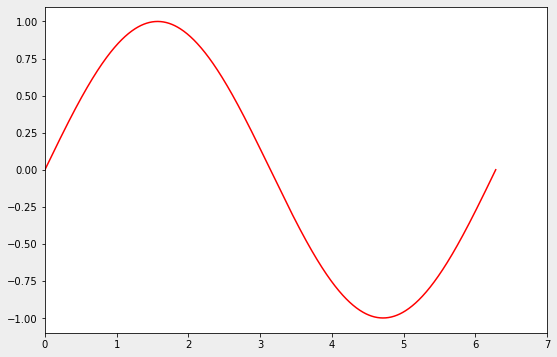

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 2*np.math.pi, 800)
a = np.sin(t)

plt.figure(figsize=(9, 6), facecolor=('#EEEEEE'))
plt.plot(t, a, 'r')
plt.xlim([0, 7])
plt.show()




Переключаем вывод на *notebook*. Интерфейс вывода графика меняется.

<IPython.core.display.Javascript object>


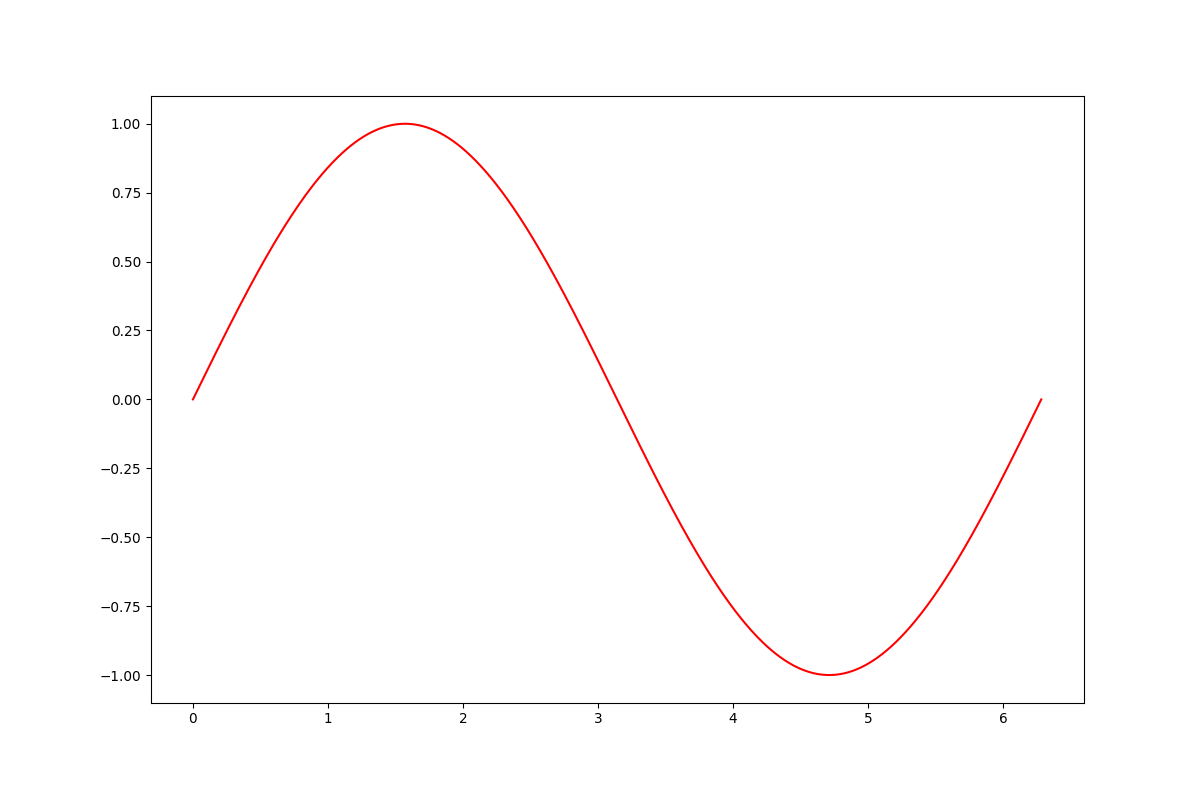

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import IPython

t = np.linspace(0, 2*np.math.pi, 800)
a = np.sin(t)
plt.figure(figsize=(9, 6))
fig2 = plt.plot(t, a, 'r')
plt.show()

Появился заголовок окна, размеры окна можно менять, появилось графическое меню с командами.  
  
Меняем вывод на Qt. Qt ─ это бекенд, может вывести график в отдельном окне. Запускаем код.  
И тут, как любят орать американцы в фильмах: Сюрпрайззззззззз!

In [1]:
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
# from IPython import get_ipython
# get_ipython().run_line_magic('matplotlib', 'qt')

t = np.linspace(0, 2*np.math.pi, 800)
a = np.sin(t)
plt.figure(figsize=(9, 6))
fig3 = plt.plot(t, a, 'r')
plt.show()


Никакого отдельного, автономного окна у нас не появилось. Появился notebook. И сообщение, что говорит о невозможности перейти на Qt и о продолжении работы в ноутбуке. Что же произошло?  
Давайте перезагрузим ядро Python на Юпитере и вновь запустим этот код. *(Kernel -> Restart)*  
  
Как мы видим, всё пошло как надо. Догадываюсь с чем связано, но опустим мои догадки и пойдём дальше.  

 ### **БАЗОВЫЕ КОМПОНЕНТЫ MATPLOTLIB**

Выведем компоненты диаграммы matplotlib без которых график просто не будет существовать. Окрасим их.

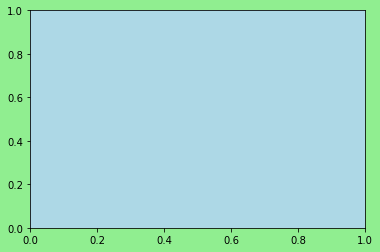

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(facecolor='lightgreen')
ax = fig.add_subplot(facecolor='lightblue')
plt.show()

Светло-зелёным цветом на диаграмме выделен компонент **figure**. Он идёт самым первым. На нём размещается всё, что имеется на диаграмме. Диаграмма может состоять из нескольких графиков, так вот **figure** размещает на себе все эти графики. Мы это далее рассмотрим. Проще говоря, **figure** ─ это плацдарм на котором размещаются график (графики) диаграммы.  
  
Светло-синим цветом выделен компонент **axes**. Это область на которой размещается непосредственно график и вспомогательные атрибуты (метки, сетка графика, надписи на графике и т. п.). Переводится как "оси", но, как мы увидим, **axes** содержит не только оси, но и много всякой всячины. Область **axes**, конечно же содержит оси: Xaxis и Yaxis со всеми необходимыми и дополнительными атрибутами.  
  
Теперь посмотрим, как можно выводить график.  
Посмотрим на *plot* (построение линейных графиков) в двух вариантах:

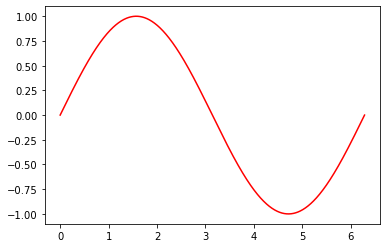

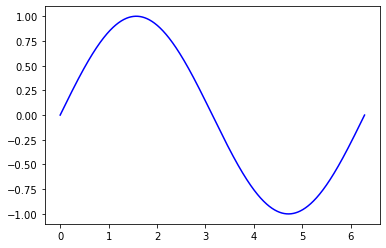

In [3]:
t = np.linspace(0, 2*np.math.pi, 800)
a = np.sin(t)

# ВАРИАНТ ПЕРВЫЙ
# определение figure и axes в переменные fig, ax
fig, ax = plt.subplots()
# размещение на области axes графика
ax.plot(t, a, 'r')
# вывод на экран
plt.show()

# ВАРИАНТ ВТОРОЙ
# быстрое создание диаграммы и вывод на экран
plt.plot(t, a, 'b')
plt.show()

Чем же эти два способа отличаются? Да, практически, ничем. Во втором варианте не нужно задавать fig и ax, код пишется быстро, понятен. Но поиски в интернете привели к такому выводу: если у вас сложный график, то необходимо использовать первый вариант. Если график не сильно сложен и нужно побыстрей посмотреть результат, то для этого подойдёт второй вариант.  
А теперь посмотрим, как разместить три графика на одной платформе figure, то есть в одном окне:

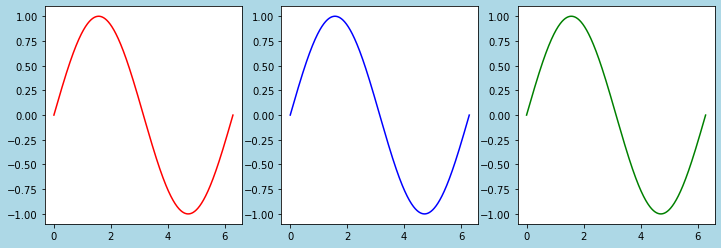

In [4]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 2*np.math.pi, 800)
a = np.sin(t)

fig, axes = plt.subplots(1, 3, figsize=(12, 4), facecolor='lightblue')
axes[0].plot(t, a, 'r')
axes[1].plot(t, a, 'b')
axes[2].plot(t, a, 'g')

plt.show()

В графике выше с помощью *subplots()* мы установили на платформе три области для **axes**. Для этого указав в аргументах (1, 3). 1 ─ это количество строк, 3 ─ количество столбцов. И обратите внимание, как происходит обращение к этим **axes**. Поскольку данные координат получились одномерные, то сразу же указываем ячейки: 0, 1 и 2.

Давайте сделаем массив координат многомерным: добавим ещё одну строку. И посмотрим, что получится.

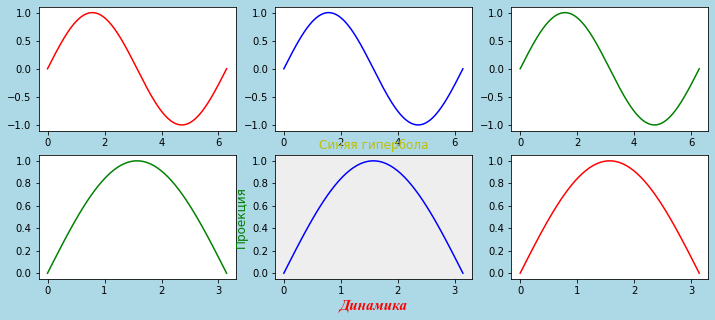

In [5]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 2*np.math.pi, 800)
a = np.sin(t)

x = np.linspace(0, np.pi)
y_sin = np.sin(x)
y_cos = np.cos(x)




fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 5), facecolor='lightblue')
axes[0, 0].plot(t, a, 'r')
axes[0, 1].plot(t, a, 'b')
axes[0, 2].plot(t, a, 'g')

axes[1, 0].plot(x, y_sin, 'g')
axes[1, 1].plot(x, y_sin, 'b')
axes[1, 2].plot(x, y_sin, 'r')

axes[1, 1].set_title('Синяя гипербола', color='y')
axes[1, 1].set_xlabel('Динамика', color='r', fontsize=15, weight='bold', style='italic', family='Times New Roman')
axes[1, 1].set_ylabel('Проекция', color='g', fontsize=12)
axes[1, 1].set_facecolor('#EEEEEE')


plt.show()

Теперь необходимо указывать полные координаты ─ строка и столбец.  
  
Ну а сейчас давайте перейдём к построению диаграмм по задачам из курса.

### **ПОСТРОЕНИЕ ДИАГРАММ ПО ЗАДАЧАМ КУРСА**
Подключаем необходимые библиотеки и загружаем датасеты из которых будем брать данные для диаграмм.


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

url = 'https://github.com/Serg-NSD/sf_data_science/blob/main/addition/churn.zip?raw=true'
url2 = 'https://github.com/Serg-NSD/sf_data_science/blob/main/addition/df_data.zip?raw=true'
df = pd.read_csv(url, compression='zip', header=0)
df2 = pd.read_csv(url2, compression='zip', header=0)
df_stat = df['Exited'].value_counts()
h_data = df[df['Balance']>2500]
database = df2.copy()
database['Опыт работы (месяц)'] = (database['Опыт работы (месяц)'] / 12).round()
display(df_stat)
display(df.head(2))
display(df2.head(2))

0    7963
1    2037
Name: Exited, dtype: int64

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


,Пол,Возраст,ЗП (руб),Валюта,Ищет работу на должность:,Город,Готовность к переезду,Готовность к командировкам,Полная занятость,Частичная занятость,...,Вахтовый метод,Удалённая работа,Опыт работы (месяц),Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Цена закрытия,Пропорция
0,М,39,29000.0,RUB,Системный администратор,другие,False,False,True,True,...,True,True,202.0,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,04-16-2019,Имеется собственный автомобиль,Неоконченное высшее,1.0,1
1,М,60,40000.0,RUB,Технический писатель,другие,False,True,True,True,...,False,True,233.0,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12-04-2019,Не указано,Высшее,1.0,1


### Начнём с *pie* ─ круговой секторной диаграммы

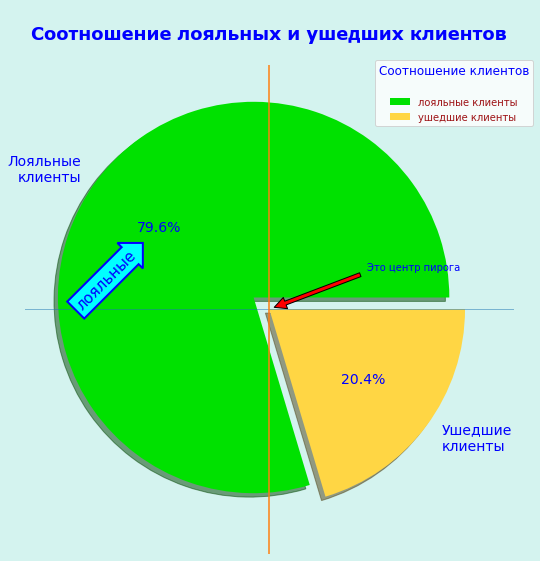

In [7]:
 %matplotlib inline

# цвет заголовка и надписей секторов
plt.rcParams['text.color'] = 'blue'

# задаём figure, axes, размер, цвет фона.
fig, axes = plt.subplots(figsize=(9, 9), facecolor='#D4F3EF')

# пишем заголовок диаграммы
axes.set_title('\nСоотношение лояльных и ушедших клиентов\n', fontsize=18, fontweight='bold', family='Verdana')

# и теперь приступаем к рисованию графика
axes.pie(
    df_stat,   # данные для графика
    labels=['Лояльные\nклиенты', 'Ушедшие\nклиенты'], # надписи секторов  
    autopct='%.1f%%', # вывести процентное соотношение клиентов   
    colors=['#00E100', '#FFD644'], # цвета секторов  
    textprops={'fontsize': 14}, # установить размер надписей секторов      
    explode=[0.1, 0],   # расстояние между секторами
    shadow=True, # включить тень на изображении
)
axes.legend(
    fontsize=10, # размер текста легенды
    labelcolor='#9E1316', # цвет текста легенды
    labels=['лояльные клиенты', 'ушедшие клиенты'], # текст легенды
    loc='upper right', # размещение легенды в правом верхнем углу
    bbox_to_anchor=(1.05, 1.02), # размещение легенды по координатам
    title='Соотношение клиентов\n', # загловок легенды
    title_fontsize='12' # размер заголовка легенды
)
axes.annotate('Это центр пирога', xy=(0, 0), xytext=(0.5, 0.2),
             arrowprops=dict(facecolor='red', shrink=0.05),
            )
axes.text(
    -1, 0, "лояльные", rotation=45, size=15,
    bbox=dict(boxstyle="rarrow, pad=0.3", fc="cyan", ec="b", lw=2))

axes.plot([-3, 3], [0, 0], linewidth=0.5)
axes.plot([0, 0], [-3, 3])

plt.show()

### Построим *hist* ─ гистограмму

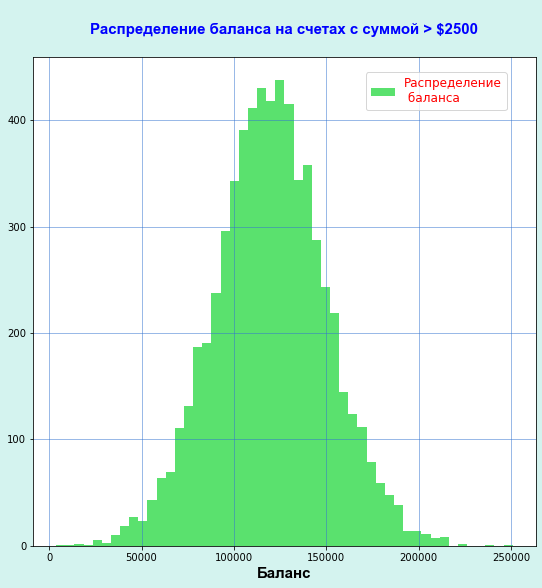

In [8]:
# задаём figure, axes, размер, цвет фона.
fig, axes = plt.subplots(figsize=(9, 9), facecolor='#D4F3EF')

# Построение гистограммы баланса на счетах
axes.hist(h_data['Balance'], color='#5AE16E', bins=50)
axes.set_title('\nРаспределение баланса на счетах с суммой > $2500\n', fontsize=15, fontfamily='Arial', fontweight='bold')
axes.set_xlabel('Баланс', fontsize=15, fontfamily='Arial', fontweight='bold')
axes.legend(labels=["Распределение\n баланса"], labelcolor='red', fontsize=12, bbox_to_anchor=(0.65, 0.98))
axes.grid(axis='y', color='#3475D0', lw = 0.5)
axes.grid(axis='x', color='#3475D0', lw = 0.5)

plt.show()

### Ещё одна гистограмма: мужчины и женщины

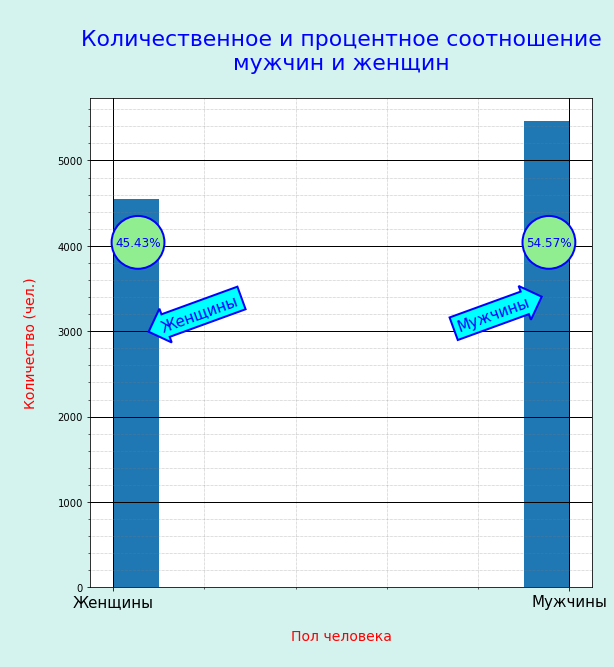

In [9]:
# задаём figure, axes, размер, цвет фона.
fig, axes = plt.subplots(figsize=(9, 9), facecolor='#D4F3EF')

# Построение гистограммы соотношения мужчин и женщин
axes.hist(df['Gender'])
axes.set_title('\nКоличественное и процентное соотношение\nмужчин и женщин\n', c='b', fontsize=22)
axes.set_xlabel('\nПол человека\n', c='r', fontsize=14)
axes.set_ylabel('\nКоличество (чел.)\n', c='r', fontsize=14)
axes.text(0.75, 3000, "Мужчины", rotation=20, size=15, bbox=dict(boxstyle="rarrow, pad=0.3", fc="cyan", ec="b", lw=2))
axes.text(0.905, 4000, "54.57%", size=12, bbox=dict(boxstyle="circle, pad=0.3", fc="lightgreen", ec="b", lw=2))
axes.text(0.1, 3000, "Женщины", rotation=20, size=15, bbox=dict(boxstyle="larrow, pad=0.3",fc="cyan", ec="b", lw=2))
axes.text(0.005, 4000, "45.43%", size=12, bbox=dict(boxstyle="circle, pad=0.3", fc="lightgreen", ec="b", lw=2))
axes.grid(which='both', color='k', linewidth=1) # параметры основной сетки
axes.minorticks_on() # разрешает выводить дополнительные компоненты, в частности вспомогательную сетку
axes.grid(which='minor', color='grey', linestyle=':', linewidth=0.5) # параметры вспомогательной сетки
axes.set_xticks([0, 1])
axes.set_xticklabels(['Женщины', 'Мужчины'], fontsize=15)

plt.show()

### Диаграмма scatter ─ диаграмма рассеяния

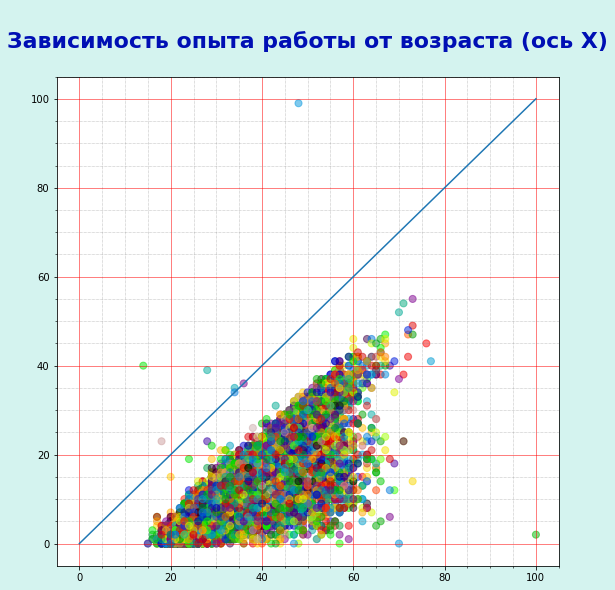

In [10]:
# задаём figure, axes, размер, цвет фона.
fig, axes = plt.subplots(figsize=(9, 9), facecolor='#D4F3EF')

axes.grid(which='both', color='r', linewidth=0.5) # параметры основной сетки
axes.minorticks_on() # разрешает выводить дополнительные компоненты, в частности вспомогательную сетку
axes.grid(which='minor', color='grey', linestyle=':', linewidth=0.5) # параметры вспомогательной сетки

# Построение диаграммы рассеяния.  
colors = np.random.randint(44744, size=(44744)) # цветовая палитра для выводимых маркеров-кружков
axes.scatter(database['Возраст'], database['Опыт работы (месяц)'], c=colors, s = 50, alpha=0.5, cmap='nipy_spectral')
axes.set_title('\nЗависимость опыта работы от возраста (ось X)\n', fontsize=22, color='#000FB4', weight='bold')
axes.plot([0,100], [0,100])

plt.show()

### **Вывод нескольких графиков. Способ первый**
Давайте возьмём две диаграммы из курса, например, гистограмму и диаграмму рассеяния и выведем их на одной подложке, то есть в одном окне. И выведем двумя способами. Итак, начнём с первого способа. Не будем определять **axes** и **fig**, а сразу же будем передавать параметры **plotly**.

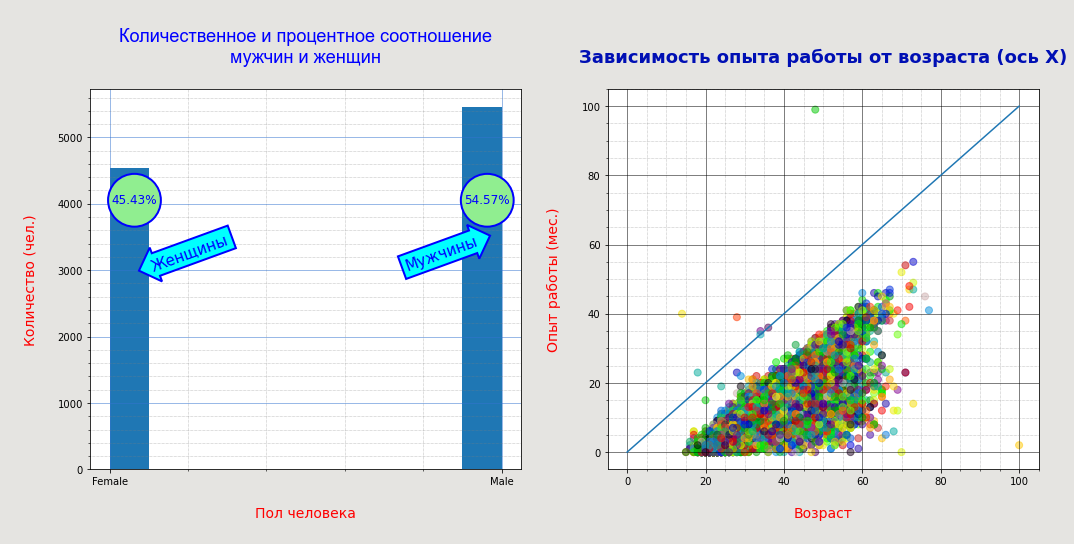

In [11]:
# Определяем функцию f_hist(), которая построит гистограмму
def f_hist():
    p1 = plt.hist(df['Gender'])
    plt.title('\nКоличественное и процентное соотношение\nмужчин и женщин\n', c='b', fontsize=18, fontfamily="Arial")
    plt.xlabel('\nПол человека\n', c='r', fontsize=14)
    plt.ylabel('\nКоличество (чел.)\n', c='r', fontsize=14)
    plt.text(0.75, 3000, "Мужчины", rotation=20, size=15, bbox=dict(boxstyle="rarrow, pad=0.3", fc="cyan", ec="b", lw=2))
    plt.text(0.905, 4000, "54.57%", size=12, bbox=dict(boxstyle="circle, pad=0.3", fc="lightgreen", ec="b", lw=2))
    plt.text(0.1, 3000, "Женщины", rotation=20, size=15, bbox=dict(boxstyle="larrow, pad=0.3",fc="cyan", ec="b", lw=2))
    plt.text(0.005, 4000, "45.43%", size=12, bbox=dict(boxstyle="circle, pad=0.3", fc="lightgreen", ec="b", lw=2))
    plt.grid(which='both', color='k', linewidth=0.5) # параметры основной сетки
    plt.minorticks_on() # разрешает выводить дополнительные компоненты, в частности вспомогательную сетку
    plt.grid(which='minor', color='grey', linestyle=':', linewidth=0.5) # параметры вспомогательной сетки
    plt.grid(axis='x', color='#3475D0', lw = 0.5)
    plt.grid(axis='y', color='#3475D0', lw = 0.5)
    return None

# Определяем функцию f_scat(), которая построит диаграмму рассеяния
def f_scat():
    colors = np.random.randint(44744, size=(44744))
    plt.scatter(database['Возраст'], database['Опыт работы (месяц)'], c=colors, s = 50, alpha=0.5, cmap='nipy_spectral')
    plt.title('\nЗависимость опыта работы от возраста (ось X)\n', fontsize=18, color='#000FB4', weight='bold')
    plt.xlabel('\nВозраст\n', c='r', fontsize=14)
    plt.ylabel('\nОпыт работы (мес.)\n', c='r', fontsize=14)
    plt.plot([0,100], [0,100])
    plt.grid(which='both', color='k', linewidth=0.5) # параметры основной сетки
    plt.minorticks_on() # разрешает выводить дополнительные компоненты, в частности вспомогательную сетку
    plt.grid(which='minor', color='grey', linestyle=':', linewidth=0.5) # параметры вспомогательной сетки
    
    #plt.show()
    return None

# определяем figure, задаём её размеры, цвет фона
plt.figure(figsize=(17,7), facecolor='#E5E4E1')

# 1 строка, 2 столбца 1-ая ячейка
plt.subplot (1, 2, 1)
f_hist()

# 1 строка, 2 столбца, 2-ая ячейка
plt.subplot (1, 2, 2)
f_scat()

plt.show()


### **Вывод нескольких графиков. Способ второй**
Использую те же два графика, что были выше. Хочу показать некоторые различия. Теперь будем определять **axes** и **fig**. Хотя переменную **fig** можно и не трогать, мы только зададим размеры всего "холста" **figure**.

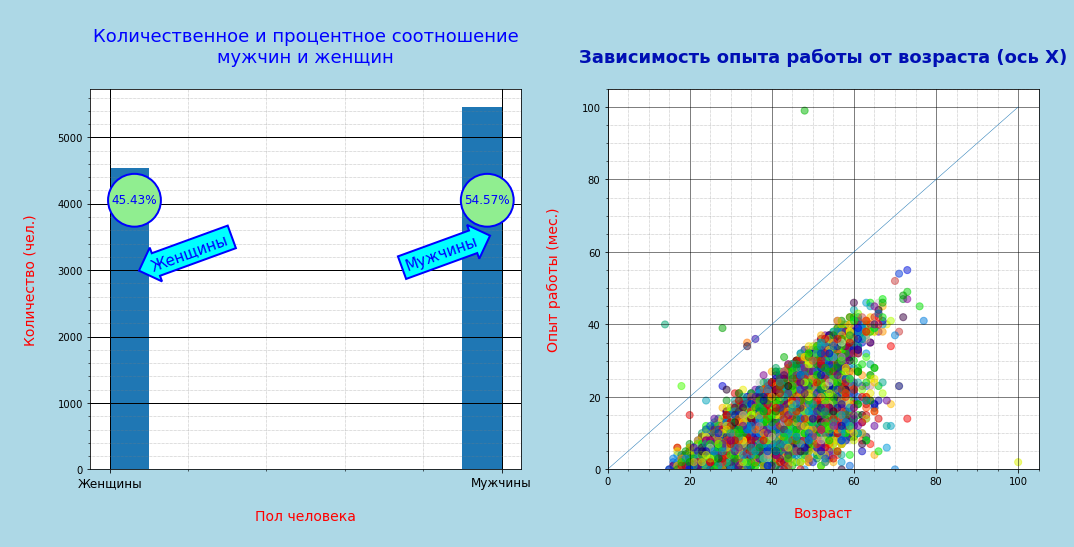

In [12]:
# определяем figure, задаём её размеры, цвет фона, количество строк и столбцов
fig, axs = plt.subplots(nrows=1, ncols=2,  figsize=(17, 7), facecolor='lightblue')

# Построение гистограммы соотношения мужчин и женщин в первой ячейке
axs[0].hist(df['Gender'])
axs[0].set_title('\nКоличественное и процентное соотношение\nмужчин и женщин\n', c='b', fontsize=18)
axs[0].set_xlabel('\nПол человека\n', c='r', fontsize=14)
axs[0].set_ylabel('\nКоличество (чел.)\n', c='r', fontsize=14)
axs[0].text(0.75, 3000, "Мужчины", rotation=20, size=15, bbox=dict(boxstyle="rarrow, pad=0.3", fc="cyan", ec="b", lw=2))
axs[0].text(0.905, 4000, "54.57%", size=12, bbox=dict(boxstyle="circle, pad=0.3", fc="lightgreen", ec="b", lw=2))
axs[0].text(0.1, 3000, "Женщины", rotation=20, size=15, bbox=dict(boxstyle="larrow, pad=0.3",fc="cyan", ec="b", lw=2))
axs[0].text(0.005, 4000, "45.43%", size=12, bbox=dict(boxstyle="circle, pad=0.3", fc="lightgreen", ec="b", lw=2))
axs[0].minorticks_on()
axs[0].grid(which='both', color='k', linewidth=1)
axs[0].grid(which='minor', color='grey', linestyle=':', linewidth=0.5)
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Женщины', 'Мужчины'], fontsize=12)
# plt.xlim([0, 1])

# Построение диаграммы рассеяния во второй ячейке  
colors = np.random.randint(44744, size=(44744))
axs[1].scatter(database['Возраст'], database['Опыт работы (месяц)'], c=colors, s = 50, alpha=0.5, cmap='nipy_spectral')
axs[1].set_title('\nЗависимость опыта работы от возраста (ось X)\n', fontsize=18, color='#000FB4', weight='bold')
axs[1].set_xlabel('\nВозраст\n', c='r', fontsize=14)
axs[1].set_ylabel('\nОпыт работы (мес.)\n', c='r', fontsize=14)
axs[1].plot([0,100], [0,100], linewidth=0.5)
plt.xlim([0, 105])
plt.ylim([0,105])
axs[1].minorticks_on()
axs[1].grid(which='both', color='k', linewidth=0.5)
axs[1].grid(which='minor', color='grey', linestyle=':', linewidth=0.5)



Хочу обратить внимание на то, что здесь на диаграмме рассеяния 0 по оси Х и 0 по оси У начинаются с точки левого нижнего угла, в отличии от предыдущей диаграммы, где был отступ. Убирается этот отступ с помощью команды, которая задаёт предел по оси Х и по оси У. Это xlim() ─ ось Х и ylim() ─ ось У. В коде можете их увидеть. На гистограмме шкалу поправить с помощью этих команд не удалось, видимо это невозможно в принципе, или же есть какой-то другой путь.  
  
Обратите особое внимание на <a href="https://chel-center.ru/python-yfc/2021/06/03/vizualizatsiya-dannyh-v-python-s-ispolzovaniem-plt-scatter/"><font color='green'>эту статью</font></a> про диаграмму рассеяния (она же график разбрасывания, она же пузырьковая диаграмма). Хорошая статья.
